# Collocations with Morphemes

In [1]:
from scripts.imports import *
out = Exporter(paths['outdir'], 'timeXmorphs')

In [2]:
df.head()

,verse,book,booksuper,canon_part,period,genre,domain,gendom,function,quality,...,TIMEAPPO,SPEC,SFX:3,SFX,DUAL,DEMON,SFX:1,SFX:2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,prose,?,prose.?,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,prose,N,prose.N,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,prose,N,prose.N,simultaneous,location,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427693,Genesis 2:5,Genesis,Genesis,Law,SBH,prose,D,prose.D,anterior,sequence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427694,Genesis 2:5,Genesis,Genesis,Law,SBH,prose,D,prose.D,anterior,sequence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'genre', 'domain',
       'gendom', 'function', 'quality', 'name', 'text', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'n_times', 'lex_token', 'is_advb',
       'cl_kind', 'clause', 'sentence', 'cl_rela', 'verb', 'verbform',
       'verb_etcbc', 'verb_txt', 'PP', 'unmodified', 'APPO', 'DEF', 'Ø', 'GP',
       'QUANT', 'PL', 'NUM', 'PARA', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX:3',
       'SFX', 'DUAL', 'DEMON', 'SFX:1', 'SFX:2', 'ADVB', 'CARDC'],
      dtype='object')

## Build the Counts

In [13]:
# convert morph nodes into boolean values
morphs = [
    'PL', 'DUAL', 'SFX:1', 
    'SFX:2', 'SFX:3'
]

morph_bool = 1*(~df_sg[morphs].isna())

morph_df = df[['times_utf8', 'times_utf8d']].join(morph_bool, how='right')

morph_df['Ø'] = 1*(morph_df[morphs].sum(1) == 0)

In [14]:
morph_df

,times_utf8,times_utf8d,PL,DUAL,SFX:1,SFX:2,SFX:3,Ø
node,,,,,,,,
427553,ראשׁית,תישאר,0,0,0,0,0,1
427680,יום,םוי,0,0,0,0,0,1
427682,יום,םוי,0,0,0,0,0,1
427805,רוח,חור,0,0,0,0,0,1
427835,יום,םוי,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
515601,שׁנה,הנש,0,0,0,0,0,1
515619,תשׁובה,הבושת,0,0,0,0,0,1
515624,שׁנה,הנש,0,0,0,0,0,1


In [15]:
# prune to top x occurring terms
lex_ct = morph_df.times_utf8.value_counts()

lex_ct.head(30)

יום       1265
שׁנה       285
עולם       175
עת         138
בקר        107
לילה        90
ערב         74
חדשׁ        48
אחר         33
מות         29
נצח         26
מתי         25
מחרת        23
פנה         20
עד          18
דבר         14
ראשׁון      13
צהרים       13
אן          13
רגע          7
מועד         7
חיים         6
עשׂר         6
נעורים       6
דור          6
קציר         5
מחר          5
ראשׁית       5
שׁבוע        5
בטן          4
Name: times_utf8, dtype: int64

In [16]:
top_lexs = lex_ct[lex_ct > 4]

In [18]:
morph_ct = pd.pivot_table(
    morph_df[morph_df.times_utf8.isin(top_lexs.index)],
    index=['times_utf8', 'times_utf8d'],
    columns=morphs+['Ø'],
    aggfunc='size',
    fill_value=0,
)

print(morph_ct.shape)

morph_ct.droplevel(1, axis=0)

(29, 9)


PL            0                  1          
DUAL          0             1    0          
SFX:1         0         1   0    0         1
SFX:2         0      1  0   0    0      1  0
SFX:3         0   1  0  0   0    0   1  0  0
Ø             1   0  0  0   0    0   0  0  0
times_utf8                                  
אחר           0   0  0  0   0    0  29  2  2
אן           13   0  0  0   0    0   0  0  0
בקר         104   0  0  0   0    3   0  0  0
דבר           1   0  0  2   0   11   0  0  0
דור           1   0  0  0   0    1   2  2  0
חדשׁ         24   2  0  0   0   21   0  1  0
חיים          0   0  0  0   0    0   4  0  2
יום         873   3  0  0   2  349  25  8  5
לילה         85   0  0  0   0    5   0  0  0
מועד          4   2  0  0   0    1   0  0  0
מות          19   7  0  3   0    0   0  0  0
מחר           5   0  0  0   0    0   0  0  0
מחרת         23   0  0  0   0    0   0  0  0
מתי          25   0  0  0   0    0   0  0  0
נעורים        0   0  0  0   0    0   3  2  1
נצח          26   0  0  0   0    0   0  0  0
עד           18   0  0  0   0    0   0  0  0
עולם        170   0  0  0   0    5   0  0  0
ערב          67   0  0  0   7    0   0  0  0
עשׂר          6   0  0  0   0    0   0  0  0
עת          123  10  1  0   0    4   0  0  0
פנה           0   0  0  0   0   15   3  1  1
צהרים         0   0  0  0  13    0   0  0  0
קציר          5   0  0  0   0    0   0  0  0
ראשׁון       13   0  0  0   0    0   0  0  0
ראשׁית        5   0  0  0   0    0   0  0  0
רגע           6   0  0  0   0    1   0  0  0
שׁבוע         2   0  0  0   1    1   0  1  0
שׁנה        205   0  0  0   6   72   0  0  2

In [19]:
advbs = (morph_ct[(0, 0, 0, 0, 0, 1)] - morph_ct.sum(1)) == 0
advbs = advbs[advbs]
pd.DataFrame(advbs).droplevel(1, 0)

,0
times_utf8,
אן,True
מחר,True
מחרת,True
מתי,True
נצח,True
עד,True
עשׂר,True
קציר,True
ראשׁון,True


In [20]:
morph_ct2 = morph_ct.drop(index=advbs.index)

morph_ct.droplevel(1, 0)

PL            0                  1          
DUAL          0             1    0          
SFX:1         0         1   0    0         1
SFX:2         0      1  0   0    0      1  0
SFX:3         0   1  0  0   0    0   1  0  0
Ø             1   0  0  0   0    0   0  0  0
times_utf8                                  
אחר           0   0  0  0   0    0  29  2  2
אן           13   0  0  0   0    0   0  0  0
בקר         104   0  0  0   0    3   0  0  0
דבר           1   0  0  2   0   11   0  0  0
דור           1   0  0  0   0    1   2  2  0
חדשׁ         24   2  0  0   0   21   0  1  0
חיים          0   0  0  0   0    0   4  0  2
יום         873   3  0  0   2  349  25  8  5
לילה         85   0  0  0   0    5   0  0  0
מועד          4   2  0  0   0    1   0  0  0
מות          19   7  0  3   0    0   0  0  0
מחר           5   0  0  0   0    0   0  0  0
מחרת         23   0  0  0   0    0   0  0  0
מתי          25   0  0  0   0    0   0  0  0
נעורים        0   0  0  0   0    0   3  2  1
נצח          26   0  0  0   0    0   0  0  0
עד           18   0  0  0   0    0   0  0  0
עולם        170   0  0  0   0    5   0  0  0
ערב          67   0  0  0   7    0   0  0  0
עשׂר          6   0  0  0   0    0   0  0  0
עת          123  10  1  0   0    4   0  0  0
פנה           0   0  0  0   0   15   3  1  1
צהרים         0   0  0  0  13    0   0  0  0
קציר          5   0  0  0   0    0   0  0  0
ראשׁון       13   0  0  0   0    0   0  0  0
ראשׁית        5   0  0  0   0    0   0  0  0
רגע           6   0  0  0   0    1   0  0  0
שׁבוע         2   0  0  0   1    1   0  1  0
שׁנה        205   0  0  0   6   72   0  0  2

In [21]:
# Apply deltaP
morph_dp = sig.apply_deltaP(morph_ct2, 0, 1)

morph_dp.droplevel(1,0)

PL                 0                                                 1  \
DUAL               0                                       1         0   
SFX:1              0                             1         0         0   
SFX:2              0                   1         0         0         0   
SFX:3              0         1         0         0         0         0   
Ø                  1         0         0         0         0         0   
times_utf8                                                               
אחר        -0.733769 -0.010458 -0.000436 -0.002179 -0.012636 -0.213072   
בקר         0.260571 -0.010806 -0.000450 -0.002251 -0.013057 -0.190783   
דבר        -0.655883 -0.010372 -0.000432  0.141561 -0.012532  0.579146   
דור        -0.558140 -0.010336 -0.000431 -0.002153 -0.012489 -0.043497   
חדשׁ       -0.228070  0.032018 -0.000439 -0.002193 -0.012719  0.232237   
חיים       -0.725237 -0.010336 -0.000431 -0.002153 -0.012489 -0.210594   
יום        -0.072817 -0.017384 -0.000941 -0.004704 -0.023819  0.144187   
לילה        0.229967 -0.010724 -0.000447 -0.002234 -0.012958 -0.160709   
מועד       -0.152397  0.276236 -0.000431 -0.002154 -0.012495 -0.067397   
מות        -0.069056  0.233985 -0.000435  0.102578 -0.012614 -0.212701   
נעורים     -0.725237 -0.010336 -0.000431 -0.002153 -0.012489 -0.210594   
עולם        0.268224 -0.011147 -0.000464 -0.002322 -0.013470 -0.196231   
ערב         0.188014 -0.010648 -0.000444 -0.002218  0.084834 -0.216948   
עת          0.178519  0.066071  0.007246 -0.002283 -0.013242 -0.192476   
פנה        -0.729636 -0.010399 -0.000433 -0.002166 -0.012565  0.544627   
צהרים      -0.727430 -0.010367 -0.000432 -0.002160  0.993089 -0.211231   
רגע         0.134179 -0.010340 -0.000431 -0.002154 -0.012495 -0.067397   
שׁבוע      -0.324064 -0.010331 -0.000430 -0.002152  0.187947 -0.010073   
שׁנה       -0.004637 -0.011747 -0.000489 -0.002447  0.009795  0.048520   

PL                                        
DUAL                                      
SFX:1                                  1  
SFX:2                        1         0  
SFX:3              1         0         0  
Ø                  0         0         0  
times_utf8                                
אחר         0.862666  0.054070  0.055813  
בקר        -0.029716 -0.007654 -0.005853  
דבר        -0.028522 -0.007347 -0.005618  
דור         0.305771  0.326873 -0.005599  
חדשׁ       -0.028947  0.013816 -0.005702  
חיים        0.639966 -0.007321  0.328596  
יום        -0.018807 -0.002142 -0.003573  
לילה       -0.029491 -0.007596 -0.005809  
מועד       -0.028436 -0.007324 -0.005601  
מות        -0.028708 -0.007395 -0.005655  
נעורים      0.472868  0.326873  0.161499  
עולם       -0.030655 -0.007896 -0.006038  
ערב        -0.029281 -0.007542 -0.005768  
עת         -0.030137 -0.007763 -0.005936  
פנה         0.122704  0.043068  0.044801  
צהרים      -0.028510 -0.007343 -0.005616  
רגע        -0.028436 -0.007324 -0.005601  
שׁבוע      -0.028412  0.193112 -0.005596  
שׁנה       -0.032305 -0.008321  0.001633

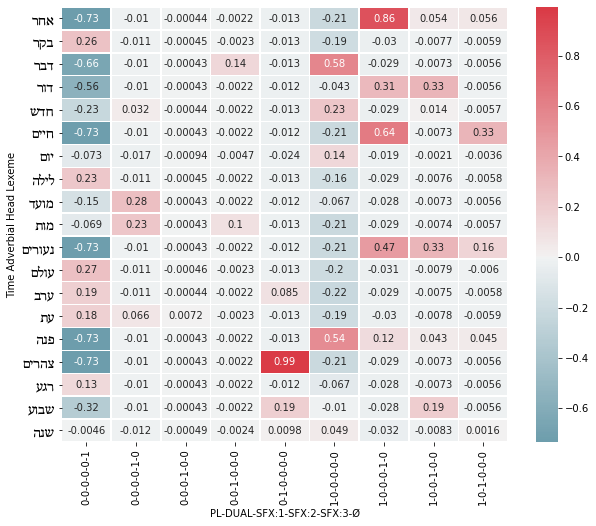

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
heatmap(morph_dp.droplevel(0, 0), ax=ax, square=False, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), size=14, fontfamily='SBL Biblit')
ax.set_ylabel('Time Adverbial Head Lexeme')
out.plot('headXmorph_ΔP')